In [28]:
def CustomParser(data):
    import json
    j1 = json.loads(data)
    return j1

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
df = pd.read_json('boardgames_100.json')

df.head()
id_to_idx = {} # A useful dictionary for converting between IDs and indices.  
for i, id in enumerate(df.loc[:,'id']):
    id_to_idx[id] = i

In [30]:
df['recommendations'] = df['recommendations'].apply(lambda x: x['fans_liked'])

In [31]:
adj_matrix = np.zeros((100,100))

In [32]:
for index in range(100):
    #print(f"{index} : {df.iloc[index]['recommendations']}")
    # Construct the graph
    v = id_to_idx[df.iloc[index]['id']] # Source node
    for endpoint in df.iloc[index]['recommendations']:
        try:
            w = id_to_idx[endpoint] # Sink node
            # Construct a directed edge (v, w)
            adj_matrix[v][w] = 1
        except:
            pass

In [33]:
# Get the categories
df.types = df.types.apply(lambda x: x['categories'])
df.types = df.types.apply(lambda x: x[0]['name'])


In [34]:
print(df.types)

0         Adventure
1          Economic
2     Environmental
3           Animals
4      Civilization
          ...      
95        Card Game
96         Medieval
97             Dice
98        Adventure
99        Adventure
Name: types, Length: 100, dtype: object


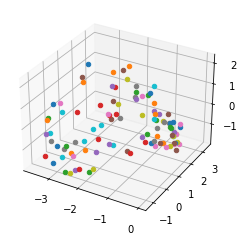

In [36]:
u,s,vt = np.linalg.svd(adj_matrix)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = u[:,0]
y = u[:,1]
z = u[:,2]

for i, datapoint in enumerate(adj_matrix):
    # Represent the datapoint in our new basis consisting of x,y,z
    # AKA, the 3 most significant singular vectors of the data matrix
    xs = np.dot(x, datapoint)
    ys = np.dot(y, datapoint)
    zs = np.dot(z, datapoint)
    
    ax.scatter(xs, ys, zs)

plt.show()

